# Mango variant visualization tools 
bdgenomics.mango.variantViz

Note: where “population” is required as a parameters such as “AF_AFR” - allele frequency African/African American, see list of populations at: https://macarthurlab.org/2017/02/27/the-genome-aggregation-database-gnomad/

### Load data

In [1]:
%matplotlib inline
from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.adam.rdd import AlignmentRecordRDD, CoverageRDD
ac = ADAMContext(spark)
data = ac.loadVariants("../../mango-core/src/test/resources/exome_chr22.adam")
data_geno = ac.loadGenotypes("../../mango-core/src/test/resources/geno.test1.adam")

### Population Frequency Scattergram
Scattergram comparing comparing allele frequencies of variants in two populations

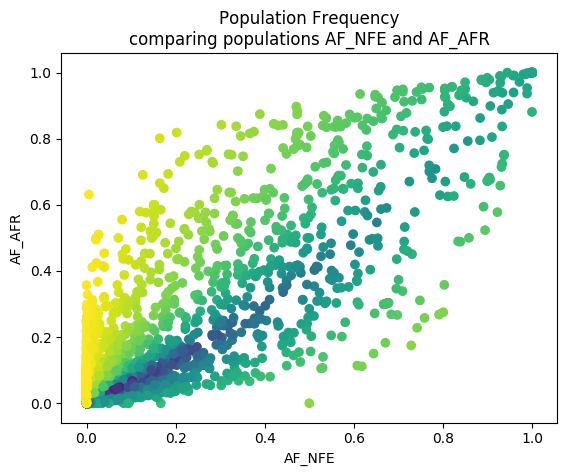

In [2]:
from bdgenomics.mango.variantViz import VariantFreqPopCompareScatter
"""
class VariantFreqPopCompareScatter
:param ss: SparkContext
:param variantRDD: bdgenomics variantRDD
:param pop1: population one name 
:param pop2: population two name
"""

# create graph object
VC = VariantFreqPopCompareScatter(spark,data,'AF_NFE','AF_AFR')
# call plot on it to create graph
VC.plot()

### Histogram of allele frequency by functional category

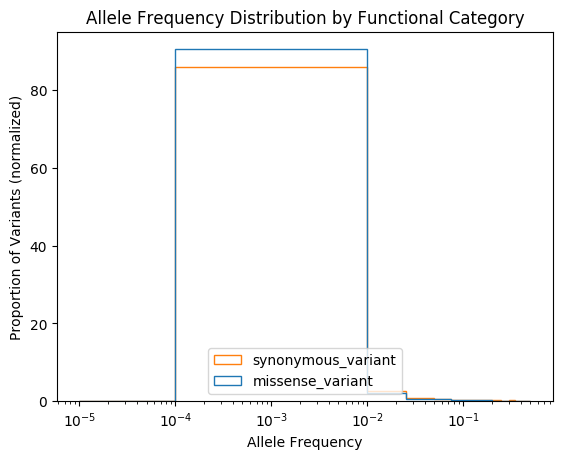

In [6]:
from bdgenomics.mango.variantViz import VariantEffectAlleleFreq
"""
class VariantEffectAlleleFreq
:param ss: the global SparkContext
:param variantRDD: a bdgenomics.adam.rdd.AlignmentRDD object
:param annot_list: a list of text sequence ontology terms
:param bins: integer number of bins in Histogram, or a list of bin boundaries
"""

# create graph object
graph = VariantEffectAlleleFreq(spark,data,['missense_variant', 'synonymous_variant'])
# call plot function
plot_data = graph.plot()

In [9]:
### Histogram of allele frequency by population

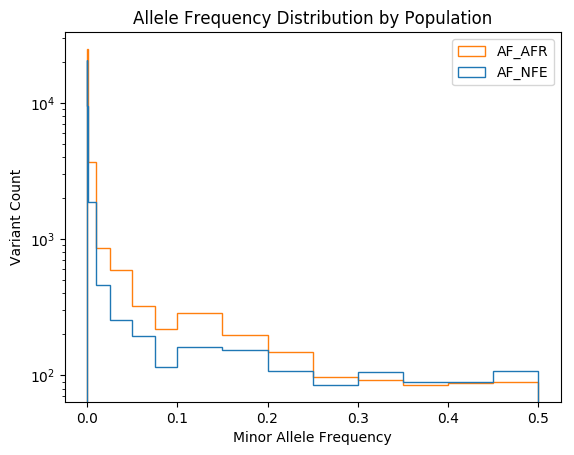

In [8]:
from bdgenomics.mango.variantViz import VariantDistribByPop
"""
class VariantDistribByPop
:param ss: SparkContext 
:param variantRDD: bdgenomics VariantRDD
:param pop_list: list of populations to include in format AF_(pop), defaults to ['AF_NFE', 'AF_AFR']
"""

# create graph object
graph = VariantDistribByPop(spark,data,['AF_NFE', 'AF_AFR'])
# run plot function
graph_data = graph.plot()

### Plot barchart showing counts of variants by variant effect types

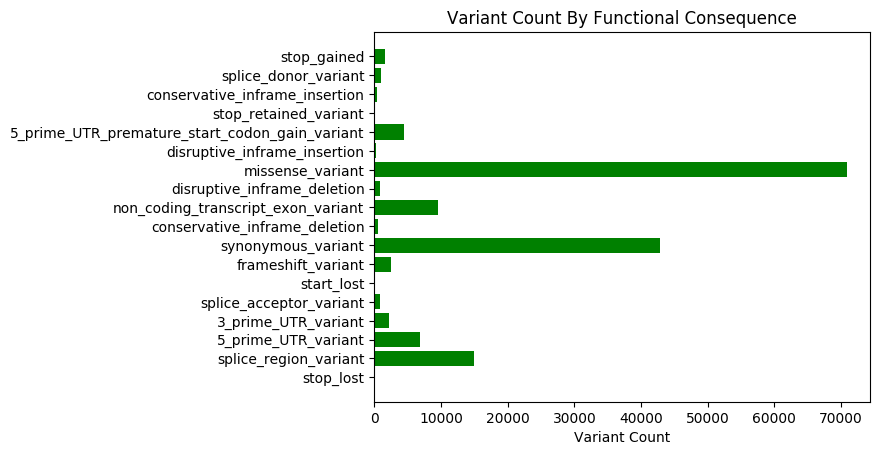

In [8]:
from bdgenomics.mango.variantViz import VariantEffectCounts
# create graph object
graph = VariantEffectCounts(spark,data)
# call plot function
graph_data = graph.plot()

### Plot Histogram of variant counts by gene for a given effect type

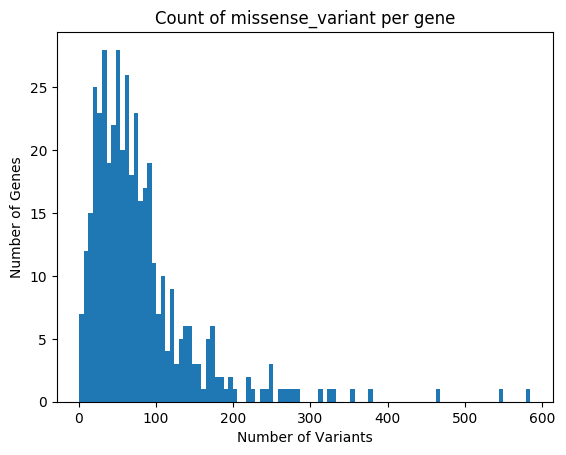

In [10]:
from bdgenomics.mango.variantViz import VariantCountByGene
"""
class VariantCountByGene
:param ss: SparkContext 
:param variantRDD: bdgenomics VariantRDD
:param so_term: sequence ontology term to count within genes
:param bins: number of bins in histograms
"""
# create graph object
graph  = VariantCountByGene(spark, data, so_term='missense_variant')
# call plot function
graph_data = graph.plot()

### Plot Histogram of variant count by gene

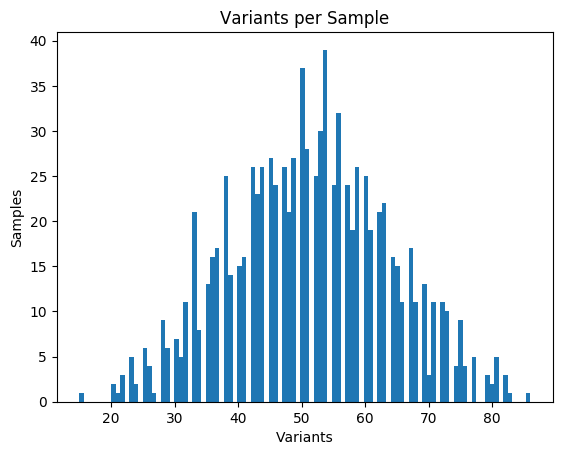

In [12]:
from bdgenomics.mango.variantViz import VariantCountPerSample
"""
class VariantCountPerSample
:param ss: SparkContext 
:param variantRDD: bdgenomics VariantRDD
:param so_term: sequence ontology term to count within genes
:param bins: number of bins in histograms
"""
# create graph object
graph = VariantCountPerSample(spark, data_geno)
# call plot function
graph_data = graph.plot()


### Plot variant density across chromosome region

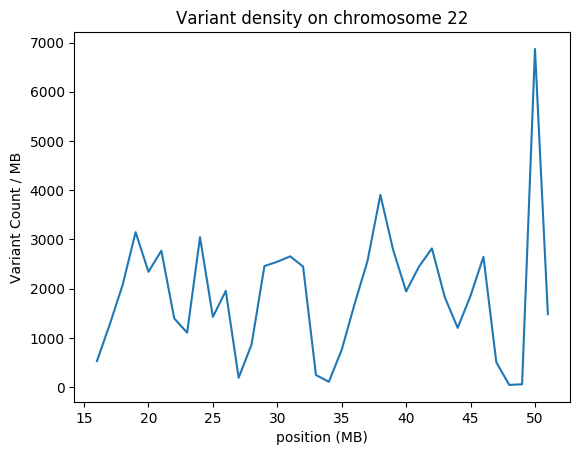

In [13]:
from bdgenomics.mango.variantViz import VariantsGenomicRegion
"""
class VariantsGenomicRegion
:param ss: SparkContext 
:param variantRDD: bdgenomics variantRDD
:param start: genomic start position
:param end:  genomic stop position
:param contigName: contig name
"""
# create graph object
graph = VariantsGenomicRegion(spark,data, start=0, end=1000000000,contigName="22")
# call plot function
graph_data = graph.plot()

### Plot Histogram of Quality By Depth (QD) score from a variant dataset

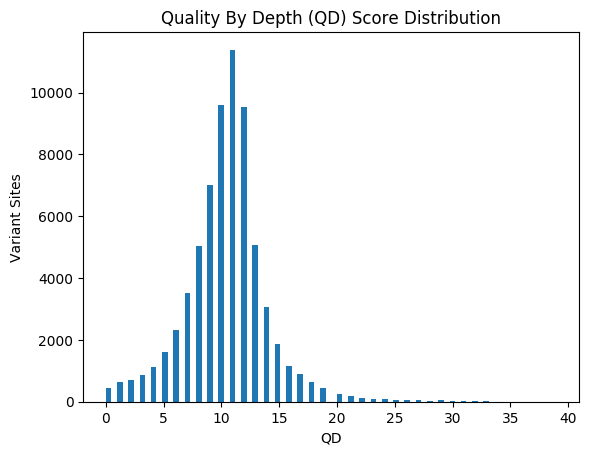

In [14]:
from bdgenomics.mango.variantViz import QDDist
"""
class QDDist
:param ss: SparkContext 
:param variantRDD: bdgenomics variantRDD
"""
# create graph object
graph= QDDist(spark,data)
# call plot function
graph_data = graph.plot()


### Plot Histogram of the heterozygote/homozygote genotype ratio

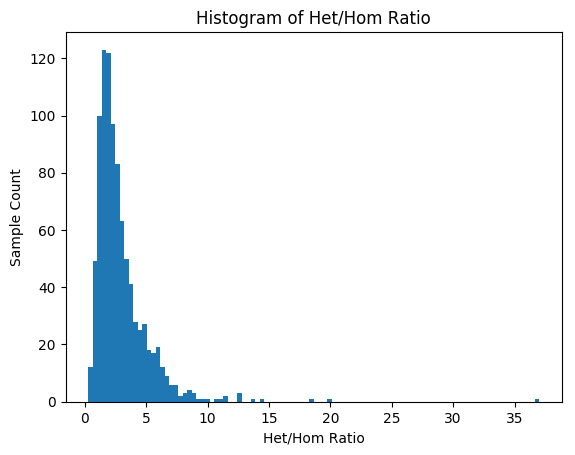

In [15]:
from bdgenomics.mango.variantViz import HetHomRatioPerSample
"""
class HetHomRatioPerSample
:param ss: SparkContext 
:param genotypeRDD: bdgenomics genotypeRDD
"""
graph = HetHomRatioPerSample(spark, data_geno)
graph_data = graph.plot()

### Plot histogram of callrate per sample

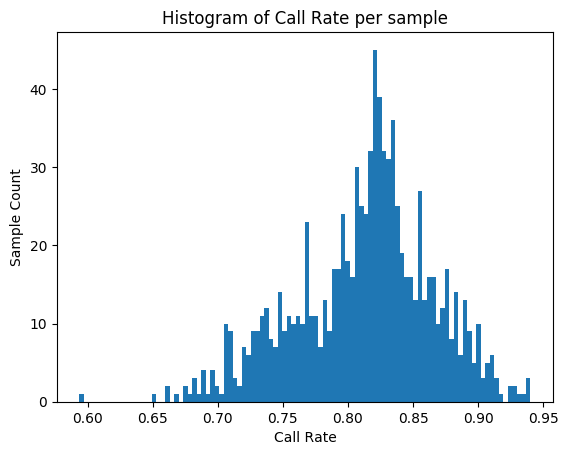

In [17]:
from bdgenomics.mango.variantViz import CallRatePerSample
# create graph object
graph = CallRatePerSample(spark,data_geno)
# call plot function
graph_data = graph.plot()
